In [1]:
#-- EDA tool--#
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import warnings
warnings.filterwarnings("ignore")

# 실거래가 데이터

In [56]:
df = pd.read_csv("../data/transaction/transaction_appended.csv")
#df

In [57]:
df = df.loc[:, "addr":]
df.tail()

,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name
280998,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,14,한신2,59.76,660000000,2021,3,18,1998,24,동일로 752
280999,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,6,한신2,59.76,660000000,2021,4,10,1998,24,동일로 752
281000,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,13,한신2,59.76,680000000,2021,4,16,1998,24,동일로 752
281001,서울특별시 중랑구 중화동 274-51,서울특별시 중랑구 동일로144길 74,서울특별시 중랑구 중화동,274-51,5,한영(101),57.66,300000000,2021,2,27,2003,19,동일로144길 74
281002,서울특별시 중랑구 중화동 274-75,서울특별시 중랑구 동일로144길 74,서울특별시 중랑구 중화동,274-75,4,한영(102),72.22,490000000,2021,5,4,2003,19,동일로144길 74


In [21]:
df.to_excel("data/transaction/transaction_확인용.xlsx", index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281003 entries, 0 to 281002
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   addr            280853 non-null  object 
 1   load_addr       281003 non-null  object 
 2   dong            281003 non-null  object 
 3   bunji           280853 non-null  object 
 4   floor           281003 non-null  int64  
 5   brand           281003 non-null  object 
 6   build_area      281003 non-null  float64
 7   price           281003 non-null  int64  
 8   contract_year   281003 non-null  int64  
 9   contract_month  281003 non-null  int64  
 10  contract_day    281003 non-null  int64  
 11  year_built      281003 non-null  int64  
 12  years_use       281003 non-null  int64  
 13  load_name       281003 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 30.0+ MB


(array([7.40400e+04, 1.19582e+05, 6.63790e+04, 1.67300e+04, 2.95300e+03,
        9.14000e+02, 2.55000e+02, 8.50000e+01, 4.10000e+01, 2.40000e+01]),
 array([-3. ,  4.2, 11.4, 18.6, 25.8, 33. , 40.2, 47.4, 54.6, 61.8, 69. ]),
 <BarContainer object of 10 artists>)

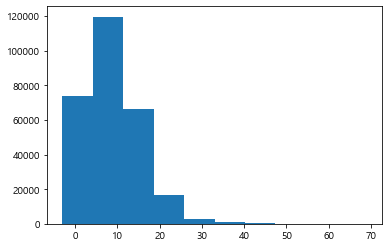

In [17]:
plt.hist(df["floor"])

In [58]:
df["floor_cat"] = pd.cut(df["floor"], bins=[-3,3,7,12,20,70],labels=["지하~3층","4~7층","8~12층","13~20층","20층 이상"])
df.head()

,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name,floor_cat
0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3,4~7층
1,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3,지하~3층
2,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3,지하~3층
3,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307,8~12층
4,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69,13~20층


(array([3.29200e+04, 1.96079e+05, 3.31860e+04, 1.40480e+04, 3.28600e+03,
        1.10500e+03, 3.74000e+02, 4.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 10.02 ,  48.524,  87.028, 125.532, 164.036, 202.54 , 241.044,
        279.548, 318.052, 356.556, 395.06 ]),
 <BarContainer object of 10 artists>)

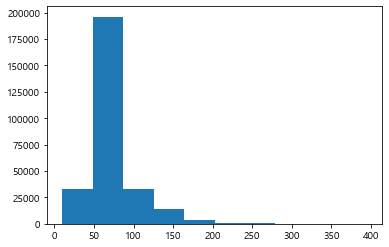

In [10]:
plt.hist(df["build_area"])

In [61]:
# 60이하 : 소형, 61~85 : 중형, 86~134 : 대형, 135이상 : 초대형 으로 구분하는 grade컬럼 생성

df['build_area_grade'] = pd.cut(x=df['build_area'], 
                                  bins=[df['build_area'].min(),60,85,134,df['build_area'].max()],
                                  labels=['소형', '중형','대형','초대형'])
df

,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name,floor_cat,build_area_grade
0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3,4~7층,중형
1,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3,지하~3층,중형
2,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3,지하~3층,중형
3,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307,8~12층,초대형
4,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69,13~20층,초대형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280998,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,14,한신2,59.76,660000000,2021,3,18,1998,24,동일로 752,13~20층,소형
280999,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,6,한신2,59.76,660000000,2021,4,10,1998,24,동일로 752,4~7층,소형
281000,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,13,한신2,59.76,680000000,2021,4,16,1998,24,동일로 752,13~20층,소형
281001,서울특별시 중랑구 중화동 274-51,서울특별시 중랑구 동일로144길 74,서울특별시 중랑구 중화동,274-51,5,한영(101),57.66,300000000,2021,2,27,2003,19,동일로144길 74,4~7층,소형


In [62]:
df2 = df.pivot_table(index=["load_addr","floor_cat","build_area_grade","contract_year","contract_month"],values="price", aggfunc="mean")

In [41]:
len(df2)

191596

In [63]:
df2.to_csv("data/transaction/transaction_month.csv")

In [47]:
df2.head()

price
load_addr          floor_cat build_area_cat contract_year contract_month             
서울특별시 강남구 강남대로 240 4~7층      중형             2018          7               620000000.0
                                            2019          7               720000000.0
                                            2020          12              900000000.0
                   8~12층     소형             2021          3               370000000.0
                             중형             2018          2               690000000.0

In [45]:
x = pd.read_csv("data/transaction/transaction_month.csv")
x

,load_addr,floor_cat,build_area_cat,contract_year,contract_month,price
0,서울특별시 강남구 강남대로 240,4~7층,중형,2018,7,620000000.0
1,서울특별시 강남구 강남대로 240,4~7층,중형,2019,7,720000000.0
2,서울특별시 강남구 강남대로 240,4~7층,중형,2020,12,900000000.0
3,서울특별시 강남구 강남대로 240,8~12층,소형,2021,3,370000000.0
4,서울특별시 강남구 강남대로 240,8~12층,중형,2018,2,690000000.0
...,...,...,...,...,...,...
191591,서울특별시 중랑구 중랑천로2길 48,지하~3층,중형,2019,9,290000000.0
191592,서울특별시 중랑구 중랑천로30길 50,지하~3층,중형,2018,5,280000000.0
191593,서울특별시 중랑구 중랑천로30길 50,지하~3층,중형,2019,11,320000000.0
191594,서울특별시 중랑구 중랑천로30길 50,4~7층,중형,2018,3,280000000.0


In [46]:
df2.to_excel("data/transaction/transaction_month.xlsx")

In [ ]:
df["구"]

In [ ]:
df.pivot_table(columns=[""])

In [22]:
tmp = pd.read_csv("data/transaction/실거래가_전체.csv")
tmp.to_excel("data/transaction/실거래가_확인용.xlsx", index=False)

In [113]:
x = pd.read_csv("data/transaction/api_from_transaction.csv")
x = x.loc[:,"addr_load":]
x

,addr_load,addr,brand_name,addr_lat,addr_lng
0,서울특별시 송파구 올림픽로 435,서울 송파구 신천동 17,파크리오아파트,37.521229,127.109983
1,서울특별시 강북구 솔샘로 174,서울 강북구 미아동 1353,SK북한산시티아파트,37.618443,127.013040
2,서울특별시 성북구 성북로4길 52,서울 성북구 돈암동 609-1,한신한진아파트,37.594809,127.010318
3,서울특별시 송파구 올림픽로 135,서울 송파구 잠실동 22,리센츠아파트,37.512753,127.088419
4,서울특별시 강동구 양재대로 1340,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8859,서울특별시 구로구 구로동로22길 78-6,NaN,NaN,NaN,NaN
8860,서울특별시 강북구 한천로130길 24,서울 강북구 번동 459-63,다우아파트,37.638651,127.031044
8861,서울특별시 서초구 서운로11길 41,NaN,NaN,NaN,NaN
8862,서울특별시 송파구 석촌호수로20길 17,서울 송파구 석촌동 164,청솔레이크아파트,37.505933,127.102517


In [3]:
df2 = pd.read_csv("data/transaction/transaction_appended2.csv")
df2

,Unnamed: 0,본번,부번,계약년월,구,동,addr,road_addr,dong,bunji,...,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name
0,0,658.0,1.0,201801,강남구,개포동,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,...,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3
1,1,658.0,1.0,201801,강남구,개포동,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,...,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3
2,2,658.0,1.0,201801,강남구,개포동,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,...,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3
3,3,652.0,0.0,201801,강남구,개포동,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,...,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307
4,4,12.0,2.0,201801,강남구,개포동,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,...,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616618,120218,11.0,7.0,201505,중랑구,중화동,서울특별시 중랑구 중화동 11-7,서울특별시 중랑구 봉화산로27가길 19,서울특별시 중랑구 중화동,11-7,...,4,현대휴앤미(102동),77.71,270000000,2015,5,5,2007,15,봉화산로27가길 19
616619,120219,11.0,7.0,201505,중랑구,중화동,서울특별시 중랑구 중화동 11-7,서울특별시 중랑구 봉화산로27가길 19,서울특별시 중랑구 중화동,11-7,...,6,현대휴앤미(102동),76.43,260000000,2015,5,19,2007,15,봉화산로27가길 19
616620,120220,11.0,7.0,201506,중랑구,중화동,서울특별시 중랑구 중화동 11-7,서울특별시 중랑구 봉화산로27가길 19,서울특별시 중랑구 중화동,11-7,...,6,현대휴앤미(102동),67.36,240000000,2015,6,3,2007,15,봉화산로27가길 19
616621,120221,11.0,7.0,201507,중랑구,중화동,서울특별시 중랑구 중화동 11-7,서울특별시 중랑구 봉화산로27가길 19,서울특별시 중랑구 중화동,11-7,...,3,현대휴앤미(102동),64.48,260000000,2015,7,1,2007,15,봉화산로27가길 19


In [4]:
df2 = df2.loc[:, "addr":]

In [6]:
df2["floor_cat"] = pd.cut(df2["floor"], bins=[-3,3,7,12,20,70],labels=["지하~3층","4~7층","8~12층","13~20층","20층 이상"])

(array([8.99280e+04, 4.14484e+05, 8.27660e+04, 2.34110e+04, 4.19700e+03,
        1.77100e+03, 5.90000e+01, 5.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 10.02,  51.45,  92.88, 134.31, 175.74, 217.17, 258.6 , 300.03,
        341.46, 382.89, 424.32]),
 <BarContainer object of 10 artists>)

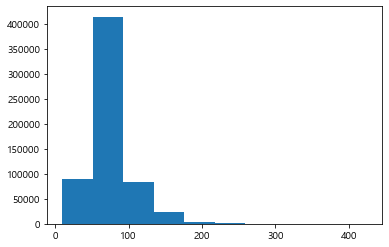

In [7]:
plt.hist(df2["build_area"])

In [8]:
# 60이하 : 소형, 61~85 : 중형, 86~134 : 대형, 135이상 : 초대형 으로 구분하는 grade컬럼 생성

df2['build_area_grade'] = pd.cut(x=df2['build_area'], 
                                  bins=[df2['build_area'].min(),60,85,134,df2['build_area'].max()],
                                  labels=['소형', '중형','대형','초대형'])
df2

,addr,road_addr,dong,bunji,시,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name,floor_cat,build_area_grade
0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,서울특별시,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3,4~7층,중형
1,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,서울특별시,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3,지하~3층,중형
2,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,서울특별시,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3,지하~3층,중형
3,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,서울특별시,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307,8~12층,초대형
4,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,서울특별시,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69,13~20층,초대형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616618,서울특별시 중랑구 중화동 11-7,서울특별시 중랑구 봉화산로27가길 19,서울특별시 중랑구 중화동,11-7,서울특별시,4,현대휴앤미(102동),77.71,270000000,2015,5,5,2007,15,봉화산로27가길 19,4~7층,중형
616619,서울특별시 중랑구 중화동 11-7,서울특별시 중랑구 봉화산로27가길 19,서울특별시 중랑구 중화동,11-7,서울특별시,6,현대휴앤미(102동),76.43,260000000,2015,5,19,2007,15,봉화산로27가길 19,4~7층,중형
616620,서울특별시 중랑구 중화동 11-7,서울특별시 중랑구 봉화산로27가길 19,서울특별시 중랑구 중화동,11-7,서울특별시,6,현대휴앤미(102동),67.36,240000000,2015,6,3,2007,15,봉화산로27가길 19,4~7층,중형
616621,서울특별시 중랑구 중화동 11-7,서울특별시 중랑구 봉화산로27가길 19,서울특별시 중랑구 중화동,11-7,서울특별시,3,현대휴앤미(102동),64.48,260000000,2015,7,1,2007,15,봉화산로27가길 19,지하~3층,중형


In [11]:
df3 = df2.pivot_table(index=["road_addr","floor_cat","build_area_grade","contract_year","contract_month"],values="price", aggfunc="mean")

In [12]:
len(df3)

416875

In [13]:
df3.to_csv("data/transaction/transaction_month2.csv")

In [15]:
df3.tail()

price
road_addr            floor_cat build_area_grade contract_year contract_month             
서울특별시 중랑구 중랑천로30길 50 지하~3층     중형               2019          11              320000000.0
                     4~7층      중형               2016          8               270000000.0
                                                              10              280000000.0
                                                2018          3               280000000.0
                                                2019          6               330000000.0

In [16]:
x = pd.read_csv("data/transaction/transaction_month2.csv")

In [18]:
x.loc[0,:]

road_addr           서울특별시 강남구  
floor_cat                 지하~3층
build_area_grade             중형
contract_year              2016
contract_month                3
price               570000000.0
Name: 0, dtype: object

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416875 entries, 0 to 416874
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   road_addr         416875 non-null  object 
 1   floor_cat         416875 non-null  object 
 2   build_area_grade  416875 non-null  object 
 3   contract_year     416875 non-null  int64  
 4   contract_month    416875 non-null  int64  
 5   price             416875 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 19.1+ MB


In [25]:
x2 = x.loc[:1000,:]

In [26]:
for i in x2.index:
    if x2.loc[i, "contract_month"] < 10:
        x2.loc[i,"date_ym"] = x2.loc[i,"contract_year"].astype(str)+"0"+x2.loc[i,"contract_month"].astype(str)
    else:
        x2.loc[i,"date_ym"] = x2.loc[i,"contract_year"].astype(str)+x2.loc[i,"contract_month"].astype(str)
        
x2.head()

,road_addr,floor_cat,build_area_grade,contract_year,contract_month,price,date_ym
0,서울특별시 강남구,지하~3층,중형,2016,3,570000000.0,201603
1,서울특별시 강남구,지하~3층,중형,2016,8,680000000.0,201608
2,서울특별시 강남구,지하~3층,중형,2016,9,700000000.0,201609
3,서울특별시 강남구,지하~3층,대형,2015,10,690000000.0,201510
4,서울특별시 강남구,지하~3층,대형,2015,11,830000000.0,201511


In [31]:
x3 = x2.loc[(x["road_addr"]=="서울특별시 강남구 강남대로 240"),["floor_cat","build_area_grade","date_ym","price"]]
x3

,floor_cat,build_area_grade,date_ym,price
20,4~7층,소형,201504,290000000.0
21,4~7층,소형,201505,310000000.0
22,4~7층,소형,201710,320000000.0
23,4~7층,중형,201501,460000000.0
24,4~7층,중형,201502,490000000.0
...,...,...,...,...
89,13~20층,중형,201806,690000000.0
90,13~20층,중형,201906,760000000.0
91,13~20층,중형,202006,810000000.0
92,13~20층,중형,202007,740000000.0


In [55]:
x4 = x3.pivot_table(index=["date_ym"],columns="build_area_grade",values="price")
x4

build_area_grade,소형,중형
date_ym,,
201501,NaN,4.766667e+08
201502,NaN,4.875000e+08
201503,NaN,5.050000e+08
201504,290000000.0,4.700000e+08
201505,310000000.0,5.050000e+08
201507,NaN,4.900000e+08
201508,315000000.0,NaN
201509,320000000.0,NaN
201510,315000000.0,NaN


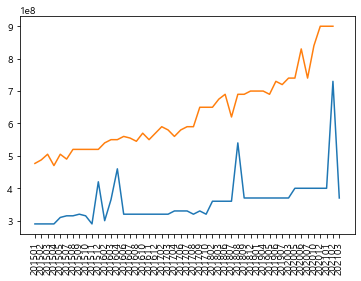

In [67]:
plt.plot(x4.fillna(method="backfill"))
plt.xticks(rotation='vertical')
plt.show()